In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [ ]:
data = pd.read_csv('diabetes_data.csv', usecols=['preg', 'plas', 'pres', 'skin','test', 'mass', 'pedi', 'age', 'class'])

In [ ]:
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
arr = data.values
arr

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

### **Classification Accuracy**

In [ ]:
X = arr[:, 0:8]
y = arr[:, 8]

k_fold = KFold(n_splits=10, random_state=42, shuffle=True)
model = LogisticRegression(max_iter=500)

results = cross_val_score(model, X, y, cv=k_fold, scoring='accuracy')

In [ ]:
results.mean()

0.770762132604238

### **Log Loss**

In [ ]:
results = cross_val_score(model, X, y, cv=k_fold, scoring='neg_log_loss')

In [ ]:
results.mean()

-0.48887375072393474

### **AUC Score**

In [ ]:
results = cross_val_score(model, X, y, cv=k_fold, scoring='roc_auc')

In [ ]:
results.mean()

0.8285242811919705

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=700, shuffle=True)

In [ ]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [ ]:
confusion_matrix(y_test, pred)

array([[131,  23],
       [ 30,  47]])

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83       154
         1.0       0.67      0.61      0.64        77

    accuracy                           0.77       231
   macro avg       0.74      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231



In [ ]:
roc_auc_score(y_test, pred)

0.7305194805194806

In [ ]:
import numpy as np

fpr, tpr, thresholds = roc_curve(y_test, pred)

In [ ]:
fpr

array([0.        , 0.14935065, 1.        ])

In [ ]:
tpr

array([0.        , 0.61038961, 1.        ])

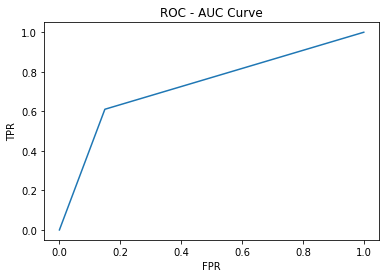

In [ ]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr)
plt.title('ROC - AUC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()